In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在Jupyter cell 之內
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) #  設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [0]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    對image X 做 zero-padding. 
    參數定義如下:
    X -- python numpy array, 呈現維度 (m, n_H, n_W, n_C), 代表一批 m 個圖像
         n_H: 圖高, n_W: 圖寬, n_C: color channels 數
    pad -- 整數, 加幾圈的 zero padding.
    Returns:
    X_pad -- image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) 做完zero-padding 的結果
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  
    return X_pad

x.shape = (4, 28, 28, 2)
x_pad.shape = (4, 34, 34, 2)
x[1,1] = [[ 0.21123366  2.04765484]
 [-0.13637251 -1.36928041]
 [ 1.27262333 -0.99856641]
 [ 0.55753264 -0.44265541]
 [ 0.08108321  3.43266343]
 [-0.74752627 -0.58668044]
 [ 0.37523545 -0.02194676]
 [-0.4060709  -0.68840754]
 [ 0.59049387  1.07737657]
 [-0.95208407 -1.1364331 ]
 [ 1.82990624 -1.42515617]
 [ 0.71533345  0.43912737]
 [-1.10296955  0.75949359]
 [-1.10321635 -1.0895511 ]
 [-1.38955024  0.83428321]
 [-0.44934585  1.08525132]
 [-0.81014003  0.61466259]
 [ 1.40741059 -0.08601351]
 [-1.12545275 -0.34257094]
 [ 1.25673747  0.73909384]
 [-0.38598809 -1.74437237]
 [ 0.71553679  1.63090625]
 [ 1.64859408  0.4327902 ]
 [-0.19102917 -0.78612127]
 [-0.57260182 -1.6497503 ]
 [ 2.13455156 -0.02696439]
 [ 2.38440514 -0.07449742]
 [-1.61831793  1.8615651 ]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 

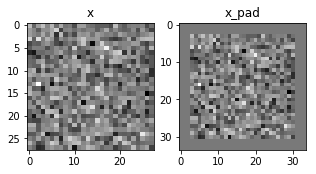

In [3]:
x = np.random.randn(4, 28, 28, 2) #產生gray image
x_pad = zero_pad(x, 3) # 加兩圈 Pad

print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [0]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    設計一個前行網路的池化層
    參數定義如下:
    A_prev -- 輸入的numpy 陣列, 維度 (m, n_H_prev, n_W_prev, n_C_prev)
    hparameter 超參數 --  "f" and "stride" 所形成的python 字典
    mode -- 池化的模式: "max" or "average"
    
    返回:
        A -- 輸出的池化層, 維度為 (m, n_H, n_W, n_C) 的 numpy 陣列
        cache -- 可以應用在 backward pass pooling layer 資料, 包含 input and hparameter
    """

    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # 檢索超參數 from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # 定義輸出的dimensions
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### 程式起始位置 ###
    for i in range(m): # 訓練樣本的for 迴圈
        for h in range(n_H): # 輸出樣本的for 迴圈, 針對vertical axis
            for w in range(n_W): #  輸出樣本的for 迴圈, 針對 horizontal axis
                for c in range (n_C): #  輸出樣本的for 迴圈, 針對channels

                    # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第i個訓練示例中
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    # 計算輸入data 的池化結果. 使用 if statment 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

                        ### 程式結束 ###
    
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [5]:
# define a new A_prev

A_prev = np.random.randn(4, 28, 28, 3)
hparameters = {"stride" : 3, "f": 4}


A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.46886039 2.05487448 0.97395322]
   [1.54869745 1.76943438 1.13160229]
   [2.00436632 1.44443833 1.49380527]
   [2.00436632 1.91557212 2.31282756]
   [1.77144672 1.34693572 2.35292126]
   [1.45595192 1.61822637 1.69249947]
   [1.14413655 2.37878892 1.79621331]
   [1.73801126 0.70703771 2.07634365]
   [1.41392441 3.40430228 2.07634365]]

  [[1.23175217 0.71006849 1.65377621]
   [1.04627182 1.89296837 1.13160229]
   [2.97578929 0.87010654 1.67386989]
   [2.97578929 0.89259408 2.29446114]
   [1.63616624 1.39631873 1.99835014]
   [2.56110109 2.5859893  1.57427819]
   [1.14413655 2.07213548 1.63835497]
   [0.94782149 2.07213548 1.63835497]
   [1.41392441 1.51630046 1.42414612]]

  [[2.0087944  3.11847959 2.33581249]
   [2.0405829  3.11847959 1.33639236]
   [0.74951427 2.06401004 1.67386989]
   [0.85742758 1.46864774 1.39473465]
   [1.1606205  1.39631873 0.84525317]
   [1.54670093 0.75702112 2.14196939]
   [1.29518318 1.73858465 0.9200786 ]
   [0.74235996 1.73858465 1.809